In [20]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Plot 1: Load and plot original point_thumb CSV file**

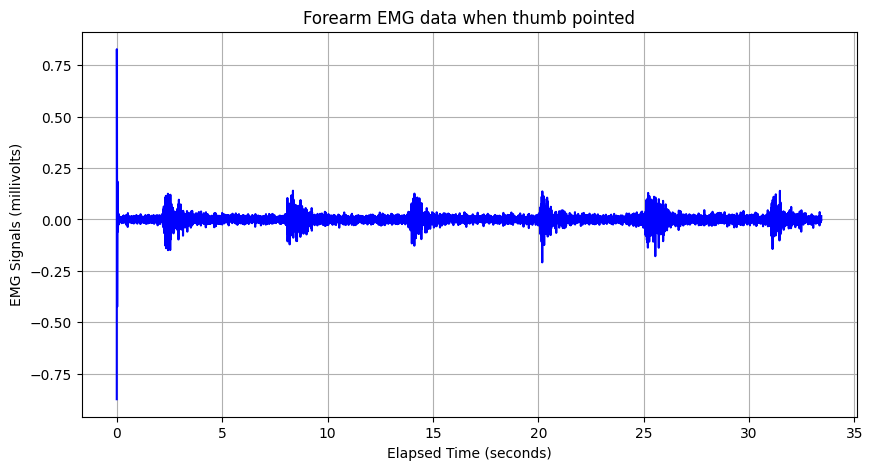

In [21]:
# Load the CSV file
file_path = "point_thumb.csv"
df = pd.read_csv(file_path)

# Convert elapsed time to numerical format (seconds)
df['Elapsed Time'] = pd.to_timedelta(df['Elapsed Time']).dt.total_seconds()

# Plot Channel 1 data
plt.figure(figsize=(10, 5))
plt.plot(df['Elapsed Time'], df['Ch1'], color='b')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('EMG Signals (millivolts)')
plt.title('Forearm EMG data when thumb pointed')
plt.grid(True)
plt.show()

**Plot 2: Start at 13 seconds to remove outliers and calibration period**

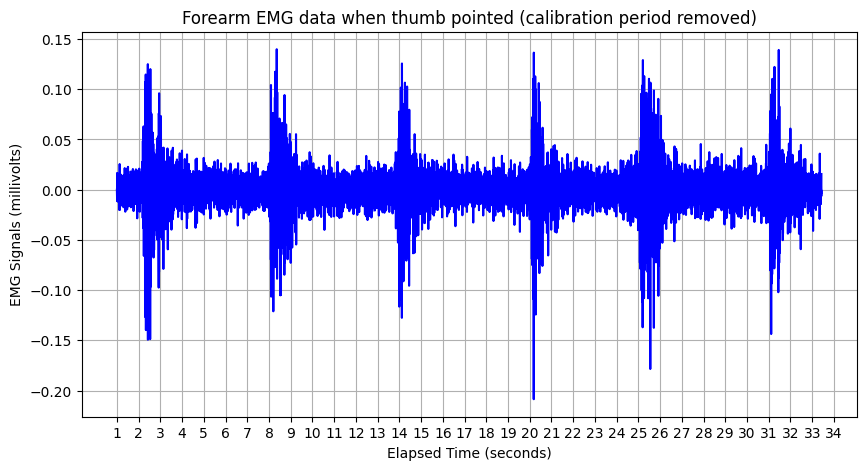

In [22]:
# Remove data before 13 seconds
df_filtered = df[df['Elapsed Time'] > 1]

# Plot the filtered Channel 1 data with x-axis labeled for every second
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Elapsed Time'], df_filtered['Ch1'], color='b')

# Set x-axis labels for every second
plt.xticks(np.arange(df_filtered['Elapsed Time'].min(), df_filtered['Elapsed Time'].max()+1, 1))

plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('EMG Signals (millivolts)')
plt.title('Forearm EMG data when thumb pointed (calibration period removed)')
plt.grid(True)
plt.show()

**Plot 3: Remove noisy data between finger movements**

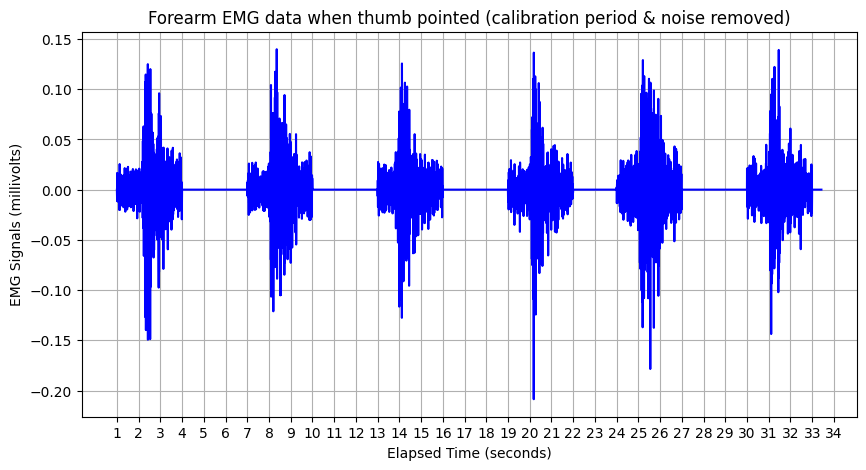

In [23]:
# Apply the mask to set values to 0 in the specified time ranges
mask = ((df['Elapsed Time'] >= 4) & (df['Elapsed Time'] <= 7)) | \
       ((df['Elapsed Time'] >= 10) & (df['Elapsed Time'] <= 13)) | \
       ((df['Elapsed Time'] >= 16) & (df['Elapsed Time'] <= 19)) | \
       ((df['Elapsed Time'] >= 22) & (df['Elapsed Time'] <= 24)) | \
       ((df['Elapsed Time'] >= 27) & (df['Elapsed Time'] <= 30)) | \
       (df['Elapsed Time'] >= 33)

df.loc[mask, 'Ch1'] = 0

# Filter to start at 1 second
df_filtered = df[df['Elapsed Time'] > 1]

# Plot the modified Channel 1 data starting from 1 second
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Elapsed Time'], df_filtered['Ch1'], color='b')

# Set x-axis labels for every second
plt.xticks(np.arange(df_filtered['Elapsed Time'].min(), df_filtered['Elapsed Time'].max()+1, 1))

plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('EMG Signals (millivolts)')
plt.title('Forearm EMG data when thumb pointed (calibration period & noise removed)')
plt.grid(True)
plt.show()